# **EDA - Exploratory Data Analysis**                                                                                     


#### Table of Contents

- Data profiling 
- Univariate Analysis
- Bivariate Analysis
- Multi variate analysis


# DATA PROFILING 
### Data profiling is the process of examining, analyzing, and creating useful summaries of data.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Data into alias called bf

bf = pd.read_csv('blackFriday_train.csv')

In [3]:
# using head() function to show top 05 rows
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# To check shape of data set i.e., No. of rows and No. of columns in Data set.

bf.shape

(550068, 12)

In [5]:
# TO check basic info of data set

bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
# Extracting columns in data using List comprehension

[fea for fea in bf.columns]

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [7]:
#To check type of data present in the columns

bf.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
#determine the number of unique categories in each variable:

bf.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [9]:
#unique categories of the GENDER variable:

bf['Gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
#unique categories of the Age variable:

bf['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#Sorting out Ages in age variable
bf_age=bf['Age'].unique()
bf_age.sort()
bf_age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [12]:
#unique categories of the Occupation variable:

bf['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [13]:
#Sorting out Occupations in Occupation variable

bf_occ=bf['Occupation'].unique()
bf_occ.sort()
bf_occ

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [14]:
#unique categories of the City_Category variable:

bf['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
#To check statistics of data

bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


 
 
 
 # Univariate Analysis
 
 ## Univariate analysis means analyzing the data of only one variable
 

## 1.Analyzing Data of Gender variable

In [16]:
#Finding out total count and values count in Gender variable
bf['Gender'].count(),  bf['Gender'].value_counts()

(550068,
 M    414259
 F    135809
 Name: Gender, dtype: int64)

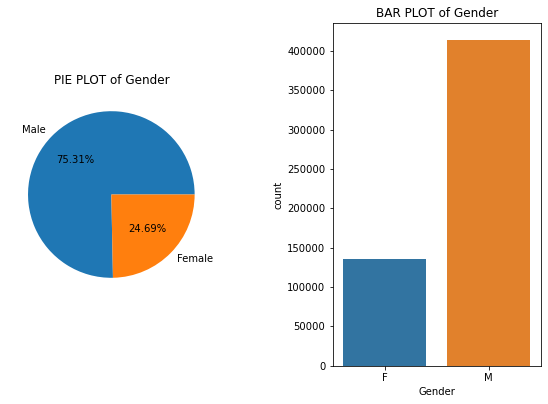

In [17]:
bf_male= bf['Gender'].value_counts()[0]
bf_female = bf['Gender'].value_counts()[1]


bf_gen = [bf_male, bf_female]
gen = ['Male', 'Female']


plt.subplot(1, 2, 1)
plt.title('PIE PLOT of Gender')
plt.pie(bf_gen, labels= gen, autopct='%1.2f%%')


plt.subplot(1, 2, 2)
plt.title('BAR PLOT of Gender')
sns.countplot(bf['Gender'])


# show plot
plt.tight_layout( pad=-5.08, h_pad=None, w_pad=5, rect=None)
plt.show()


### **Observation:**

### Univariate Analysis of *Gender Data* shows that Approximately, 75% of the number of purchases are made by Male users and rest of the 25% is done by female users

## 2.Analyzing Data of Age variable

In [18]:
#Finding out total count and values count in Age variable
bf['Age'].count(),  bf['Age'].value_counts()

(550068,
 26-35    219587
 36-45    110013
 18-25     99660
 46-50     45701
 51-55     38501
 55+       21504
 0-17      15102
 Name: Age, dtype: int64)

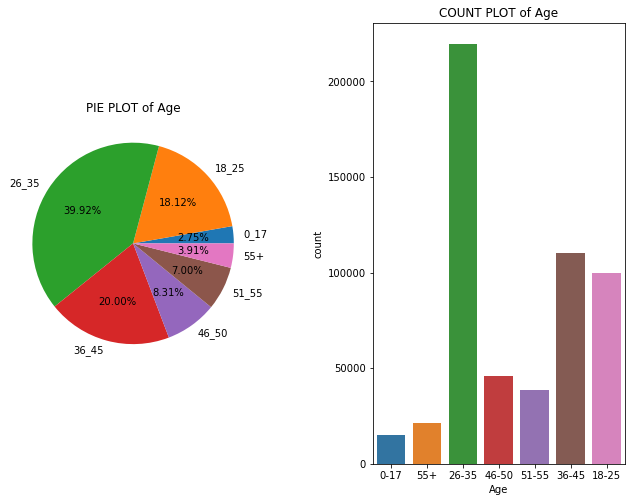

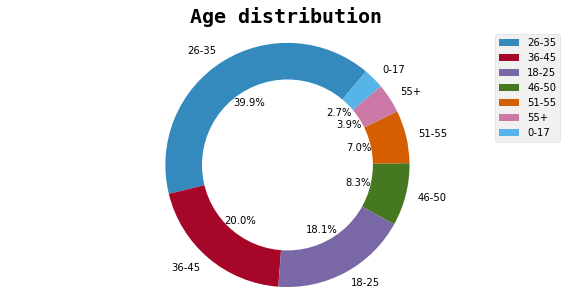

In [19]:
bf_0_17 = bf['Age'].value_counts()[6]
bf_18_25 = bf['Age'].value_counts()[2]
bf_26_35 = bf['Age'].value_counts()[0]
bf_36_45 = bf['Age'].value_counts()[1]
bf_46_50 = bf['Age'].value_counts()[3]
bf_51_55 = bf['Age'].value_counts()[4]
bf_55_ = bf['Age'].value_counts()[5]

bf_0_17, bf_18_25, bf_26_35, bf_36_45, bf_46_50, bf_51_55, bf_55_


plt.subplot(1, 2, 1)
plt.title('PIE PLOT of Age')
age = ['0_17', '18_25','26_35', '36_45', '46_50', '51_55', '55+']
bf_age = [bf_0_17, bf_18_25, bf_26_35, bf_36_45, bf_46_50, bf_51_55, bf_55_]

plt.pie(bf_age, labels= age, autopct='%1.2f%%')


plt.subplot(1, 2, 2)
plt.title('COUNT PLOT of Age')
sns.countplot(bf['Age'])

plt.tight_layout( pad=-9.99, h_pad=None, w_pad=4, rect=None)
plt.show()

# Creating a donut chart for 'Age'
age = bf['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (10, 5))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 10})
plt.show()

### **Observation:**

### Univariate Analysis of *Age Data* shows that, Age group 26-35 are the majority age group that contributed to the number of purchases.

## 3.Analyzing Data of Occupation variable

In [20]:
#Finding out total count and values count in Occupation variable
bf['Occupation'].count(), bf['Occupation'].value_counts()

(550068,
 4     72308
 0     69638
 7     59133
 1     47426
 17    40043
 20    33562
 12    31179
 14    27309
 2     26588
 16    25371
 6     20355
 3     17650
 10    12930
 5     12177
 15    12165
 11    11586
 19     8461
 13     7728
 18     6622
 9      6291
 8      1546
 Name: Occupation, dtype: int64)

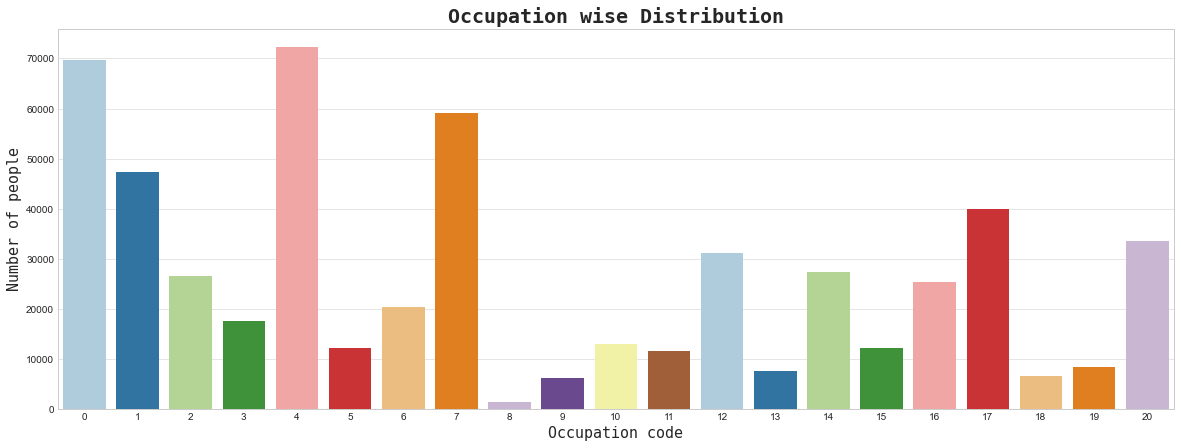

In [21]:
occupation = bf['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.show()

### **Observation:**
### Univariate Analysis of Occupation Data shows that, Occupation code 0, 4, 7 are the majority group that contributed to the number of purchases.

## 4.Analyzing Data of City_Category

In [22]:
#Finding out total count and values count in City_Category  variable
bf['City_Category'].count(), bf['City_Category'].value_counts()

(550068,
 B    231173
 C    171175
 A    147720
 Name: City_Category, dtype: int64)

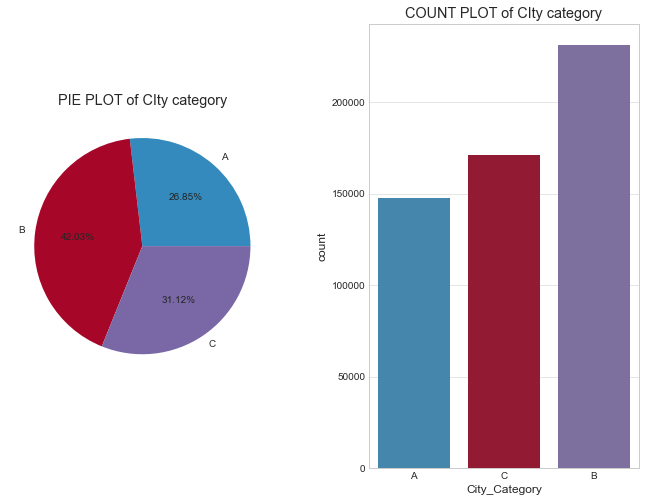

In [23]:
bf_cityA = bf['City_Category'].value_counts()[2]
bf_cityB = bf['City_Category'].value_counts()[0]
bf_cityC = bf['City_Category'].value_counts()[1]

bf_city = [bf_cityA , bf_cityB, bf_cityC]
city = ['A', 'B','C']

plt.subplot(1, 2, 1)  
plt.title('PIE PLOT of CIty category')
plt.pie(bf_city, labels= city, autopct='%1.2f%%')


plt.subplot(1, 2, 2)
plt.title('COUNT PLOT of CIty category')
sns.countplot(bf['City_Category'])


plt.tight_layout( pad=-9.99, h_pad=None, w_pad=4, rect=None)
plt.show()


### **Observation:**
### Univariate Analysis of CIty category shows that, People from City-B contributed to the most number of purchases.

## 5.Analyzing Data of Stay_In_Current_City_Years

In [24]:
#Finding out total count and values count in Marital status variable
bf['Stay_In_Current_City_Years'].count(), bf['Stay_In_Current_City_Years'].value_counts()

(550068,
 1     193821
 2     101838
 3      95285
 4+     84726
 0      74398
 Name: Stay_In_Current_City_Years, dtype: int64)

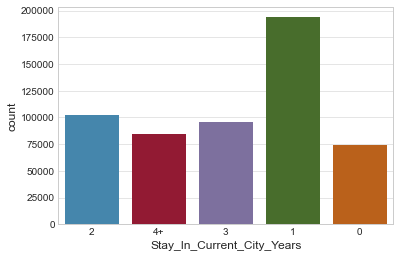

In [25]:
sns.countplot(bf['Stay_In_Current_City_Years'])
plt.show()

### **Observation:**
#### Univariate Analysis of variable Stay_In_Current_City_Years, shows that the people who have spent 1 year in the city tend to spend the most. This is understandable as, people who have spent more than 4 years in the city are generally well settled and are less interested in buying new things as compared to the people new to the city, who tend to buy more.

## 6.Analyzing Data of Marital status

In [26]:
#Finding out total count and values count in Marital status variable
bf['Marital_Status'].count(), bf['Marital_Status'].value_counts()

(550068,
 0    324731
 1    225337
 Name: Marital_Status, dtype: int64)

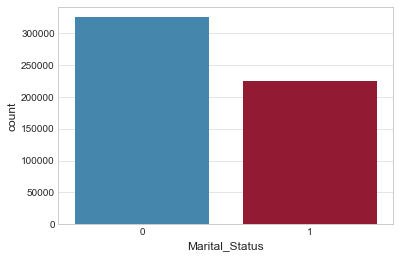

In [27]:
sns.countplot(bf['Marital_Status'])
plt.show()

### **Observation:**
#### From Univariate Analysis of Marital_Status , we came to know that Single Men spend the most during the Black Friday. It also tells that Men tend to spend less once they are married. It maybe because of the added responsibilities





 
 # Bivariate Analysis
 
 ## Bivariate analysis means comparing two variables to study their relationships. 

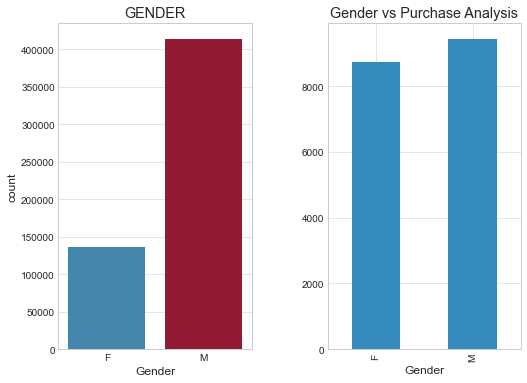

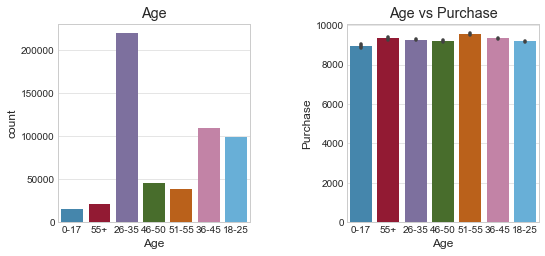

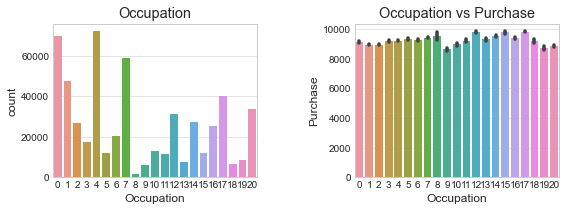

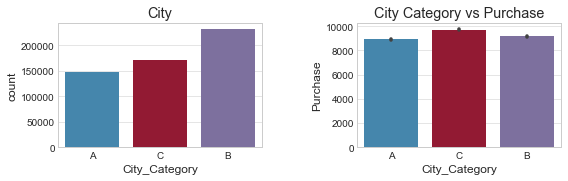

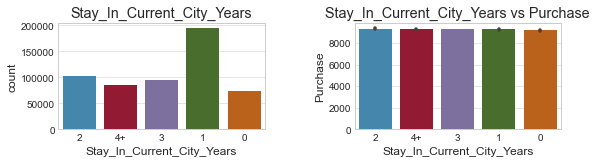

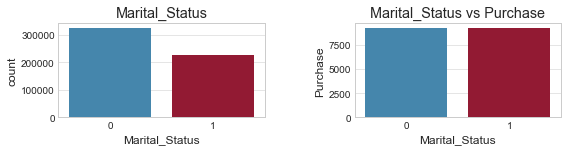

In [28]:
#1.Comparing Gender and Purchase analysis

plt.subplot(1, 2, 1)
plt.title('GENDER')
sns.countplot(bf['Gender'])


plt.subplot(1, 2, 2)
bf.groupby("Gender").mean()["Purchase"].plot(kind='bar')
plt.title("Gender vs Purchase Analysis")

plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)
plt.show()


#2.Comparing Age and Purchase analysis

plt.subplot(2, 2, 1)
plt.title('Age')
sns.countplot(bf['Age'])

plt.subplot(2, 2, 2)
plt.title('Age vs Purchase')
sns.barplot(bf['Age'], bf['Purchase'])

plt.tight_layout( pad=-5.08, h_pad=None, w_pad=5, rect=None)
plt.show()


#3.Comparing Occupation and Purchase analysis

plt.subplot(3, 2, 1)
plt.title('Occupation')
sns.countplot(bf['Occupation'])

plt.subplot(3, 2, 2)
plt.title('Occupation vs Purchase')
sns.barplot(bf['Occupation'], bf['Purchase'])

plt.tight_layout( pad=-6.08, h_pad=None, w_pad=5, rect=None)
plt.show()

#4.Comparing City_Category and Purchase analysis

plt.subplot(4, 2, 1)
plt.title('City')
sns.countplot(bf['City_Category'])

plt.subplot(4, 2, 2)
plt.title('City Category vs Purchase')
sns.barplot(bf['City_Category'], bf['Purchase'])

plt.tight_layout( pad=-6.08, h_pad=None, w_pad=5, rect=None)
plt.show()

#5.Comparing Stay_In_Current_City_Years and Purchase analysis

plt.subplot(5, 2, 1)
plt.title('Stay_In_Current_City_Years')
sns.countplot(bf['Stay_In_Current_City_Years'])

plt.subplot(5, 2, 2)
plt.title('Stay_In_Current_City_Years vs Purchase')
sns.barplot(bf['Stay_In_Current_City_Years'], bf['Purchase'])

plt.tight_layout( pad=-6.08, h_pad=None, w_pad=5, rect=None)
plt.show()

#6.Comparing Stay_In_Current_City_Years and Purchase analysis

plt.subplot(6, 2, 1)
plt.title('Marital_Status')
sns.countplot(bf['Marital_Status'])

plt.subplot(6, 2, 2)
plt.title('Marital_Status vs Purchase')
sns.barplot(bf['Marital_Status'], bf['Purchase'])

plt.tight_layout( pad=-6.08, h_pad=None, w_pad=5, rect=None)
plt.show()

### **Observation:**
#### From Bivariate Analysis of  ''Gender'' and ''Purchase'' Variable , we can understand that Number of males contributing to the sales are more compared to females. Eventhough Number of females are less, the purchase amount spent by females is almost equal to that of males. Same observation was identified with almost all other variables in comparison with purchase amount. 

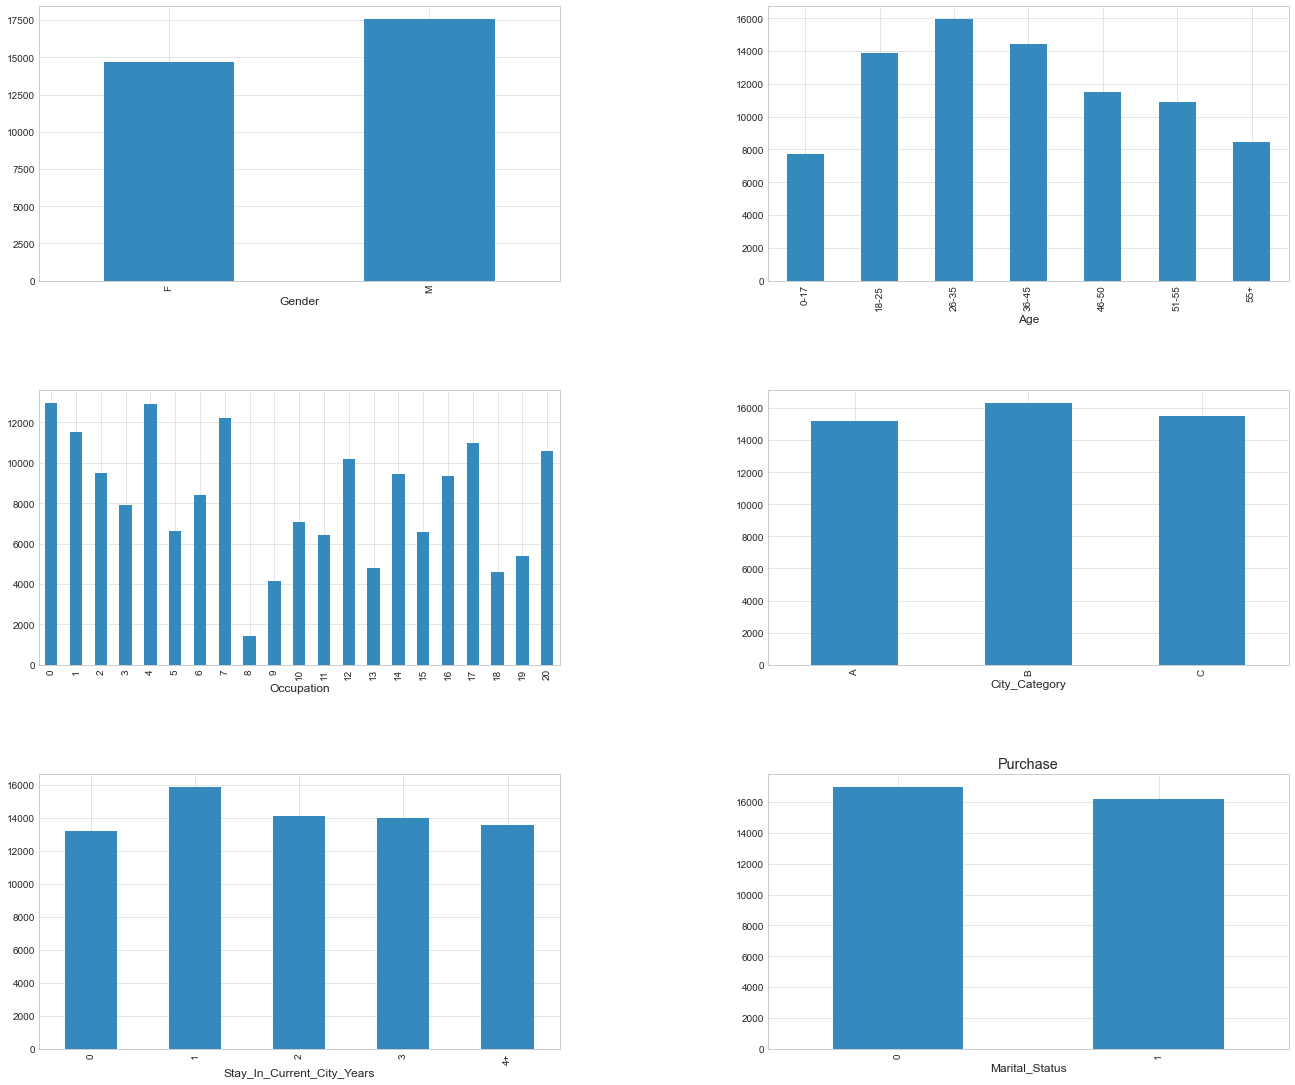

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,15))
fig.tight_layout()
fig.subplots_adjust(wspace=0.4,hspace=0.4)

bf["Purchase"].groupby(bf['Gender']).nunique().plot(kind='bar',ax=axes[0,0])
bf["Purchase"].groupby(bf['Age']).nunique().plot(kind='bar',ax=axes[0,1])
bf["Purchase"].groupby(bf['Occupation']).nunique().plot(kind='bar',ax=axes[1,0])
bf["Purchase"].groupby(bf['City_Category']).nunique().plot(kind='bar',ax=axes[1,1])
bf["Purchase"].groupby(bf['Stay_In_Current_City_Years']).nunique().plot(kind='bar',ax=axes[2,0])
bf["Purchase"].groupby(bf['Marital_Status']).nunique().plot(subplots=True,kind='bar',ax=axes[2,1])

plt.show()






 # Multivariate Analysis
 
 ## Multivariate analysis means comparing three or more variables to study their relationships. 

<AxesSubplot:>

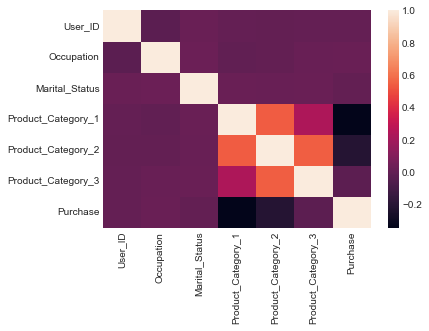

In [30]:
#Tofind out correlation between all variables.
sns.heatmap(bf.corr())

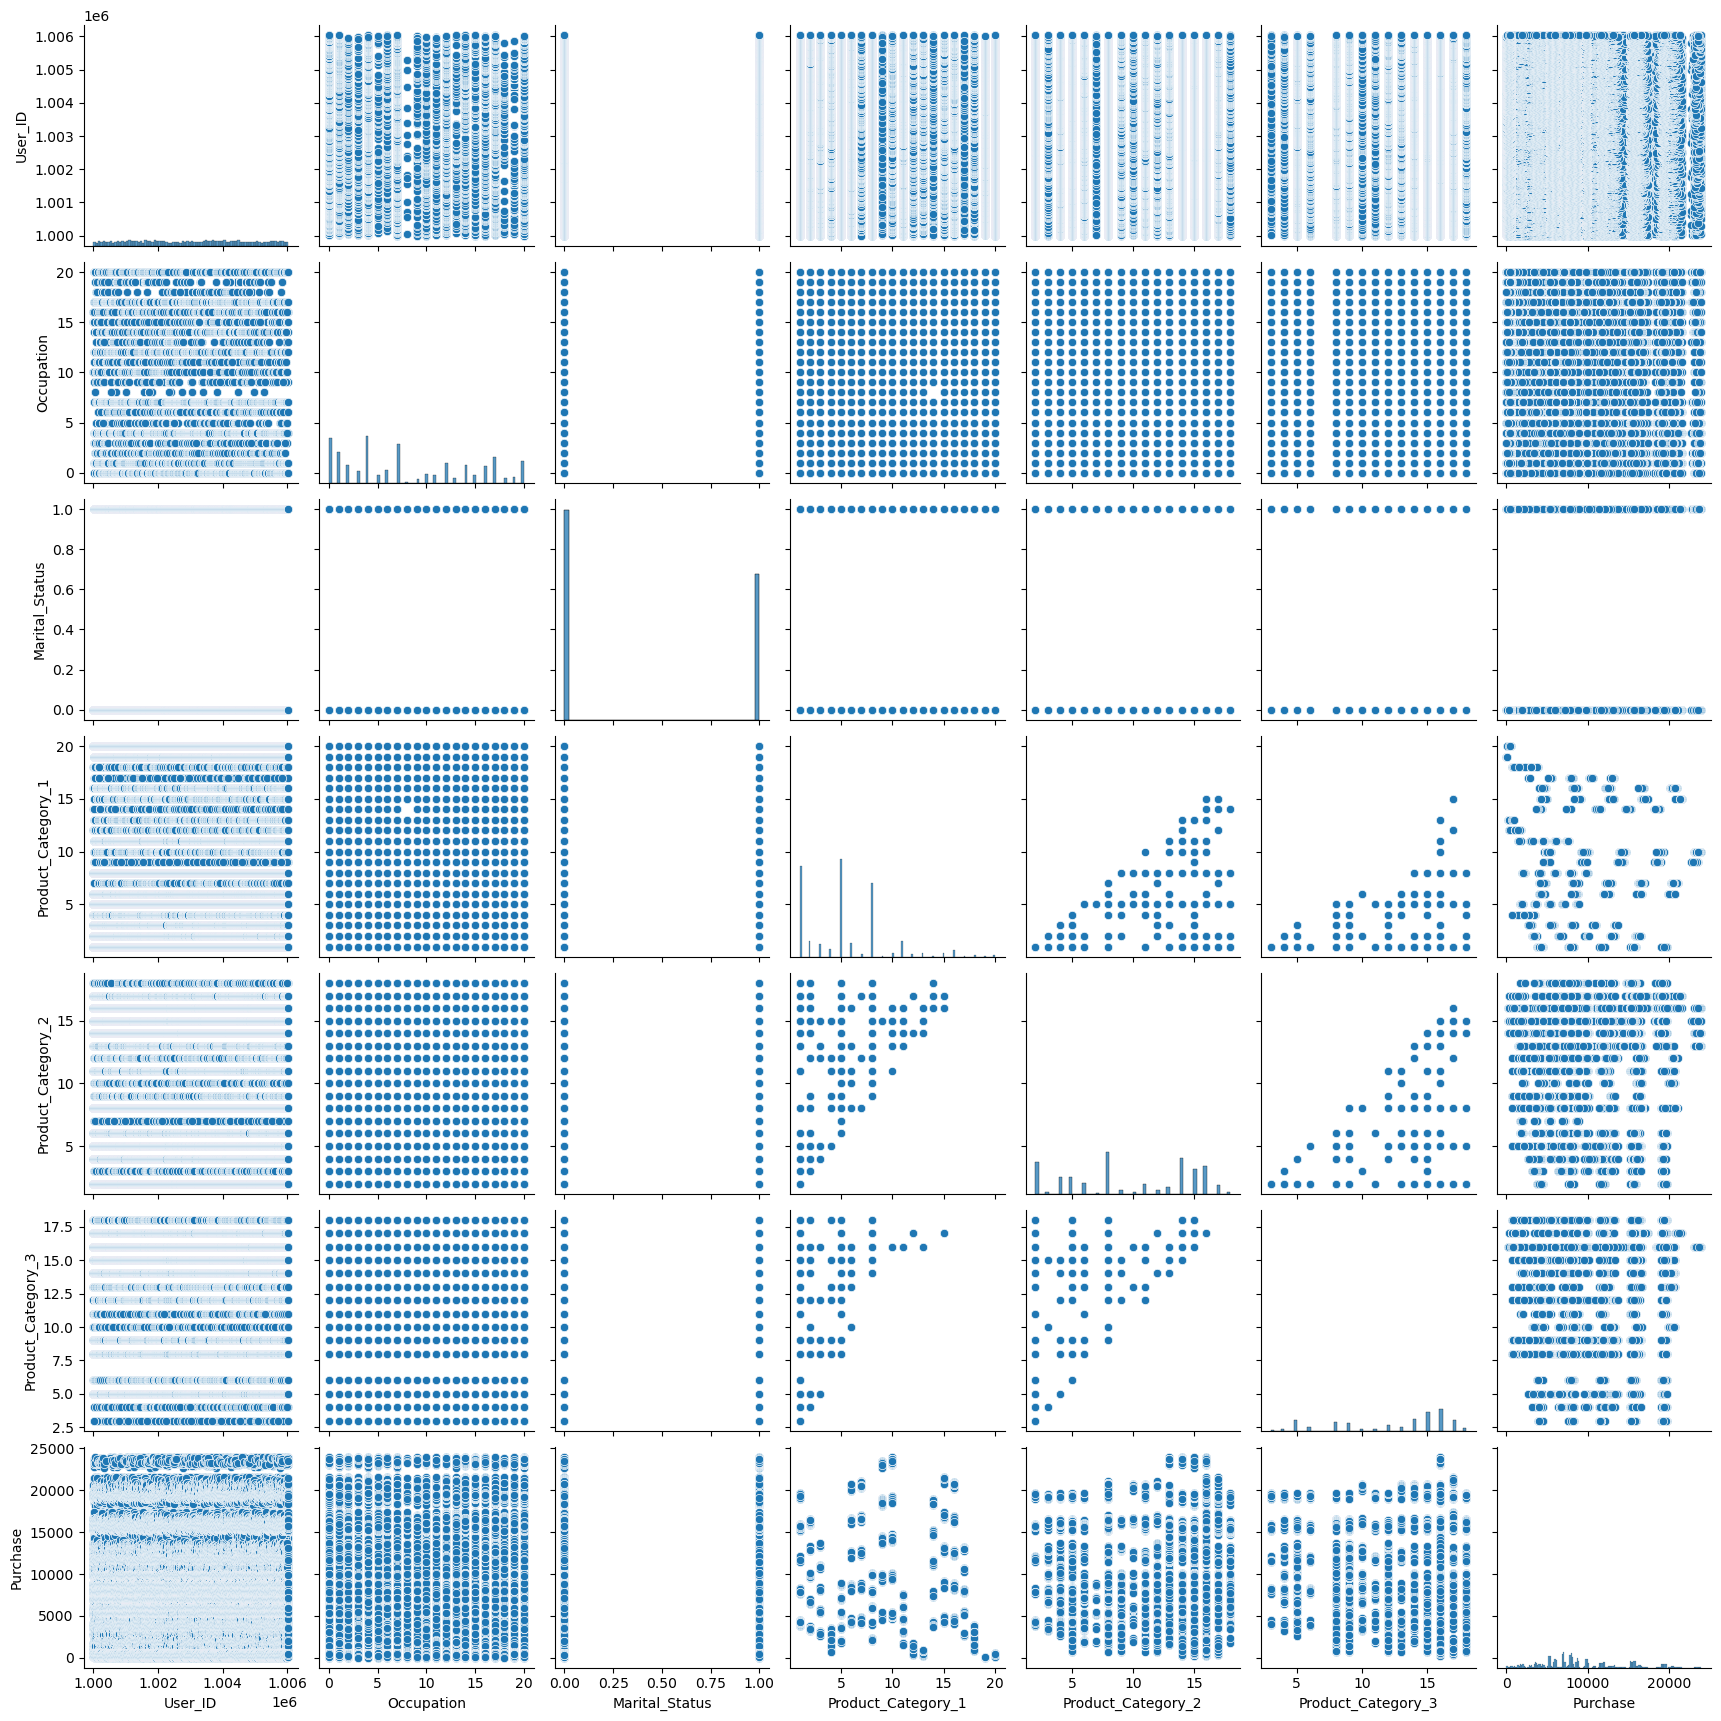

In [31]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(bf)
plt.show()

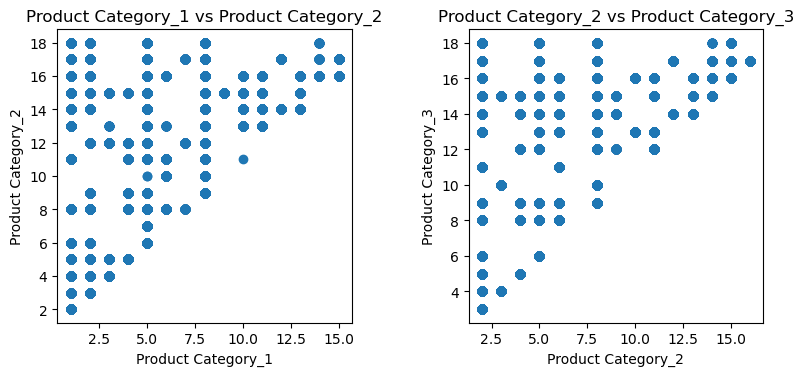

In [32]:
#comparing Product categories

plt.subplot(2,2,1)
plt.title('Product Category_1 vs Product Category_2')
plt.xlabel("Product Category_1")
plt.ylabel("Product Category_2")
plt.scatter(bf['Product_Category_1'], bf['Product_Category_2'])

plt.subplot(2,2,2)
plt.title('Product Category_2 vs Product Category_3')
plt.xlabel("Product Category_2")
plt.ylabel("Product Category_3")
plt.scatter(bf['Product_Category_2'], bf['Product_Category_3'])


plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)


plt.show()

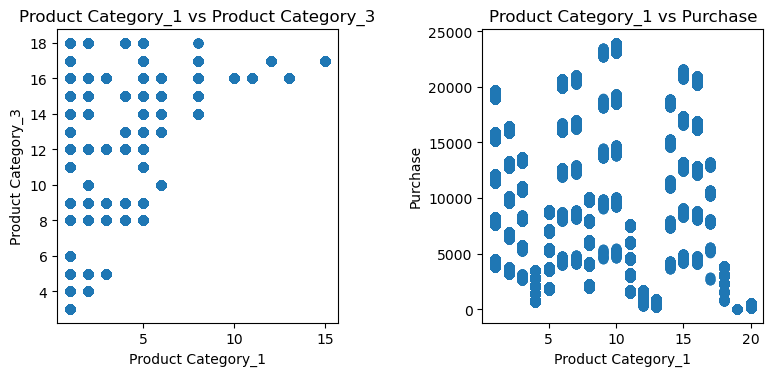

In [33]:
#comparing Product categories and purchase
plt.subplot(2,2,1)
plt.title('Product Category_1 vs Product Category_3')
plt.xlabel("Product Category_1")
plt.ylabel("Product Category_3")
plt.scatter(bf['Product_Category_1'], bf['Product_Category_3'])


plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)

plt.subplot(2,2,2)
plt.title('Product Category_1 vs Purchase')
plt.xlabel("Product Category_1")
plt.ylabel("Purchase")
plt.scatter(bf['Product_Category_1'], bf['Purchase'])


plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)



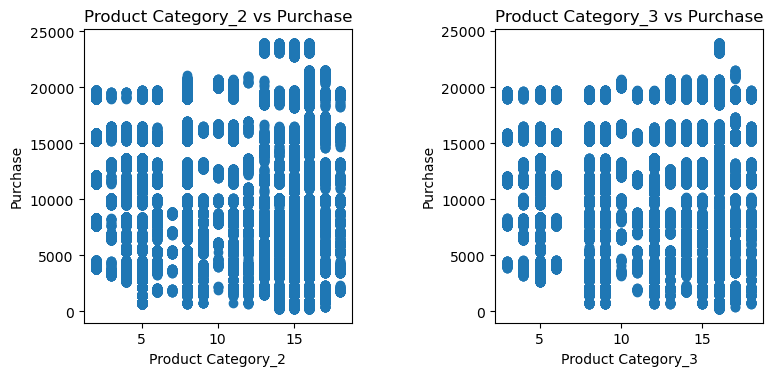

In [34]:
#comparing Product categories and purchase

plt.subplot(2,2,1)
plt.title('Product Category_2 vs Purchase')
plt.xlabel("Product Category_2")
plt.ylabel("Purchase")
plt.scatter(bf['Product_Category_2'], bf['Purchase'])


plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)


plt.subplot(2,2,2)
plt.title('Product Category_3 vs Purchase')
plt.xlabel("Product Category_3")
plt.ylabel("Purchase")
plt.scatter(bf['Product_Category_3'], bf['Purchase'])


plt.tight_layout( pad=-4.08, h_pad=None, w_pad=5, rect=None)



In [35]:
bf_p = bf[['Product_Category_1','Product_Category_2','Product_Category_3']]

<AxesSubplot:>

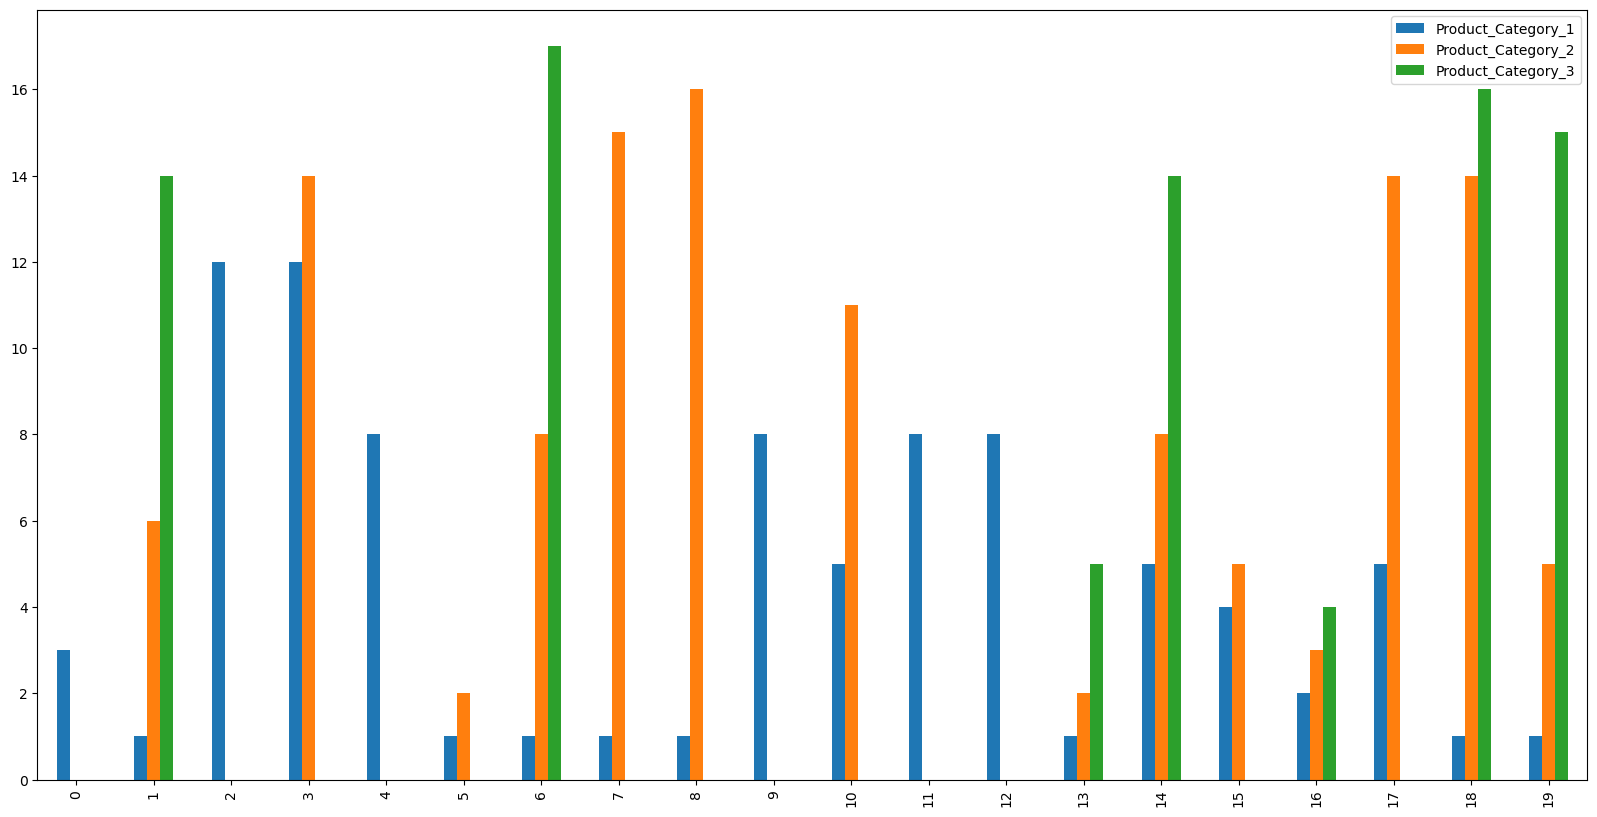

In [36]:
#Comparision among product categories
bf_p.iloc[0:20].plot(kind = 'bar',figsize = (20,10))

## Observation:

* In this way using differnt comparisions among variables, analysis can be performed to understand the data insights